## y= relu ( (X․W ) + b )

In [1]:
import tensorflow as tf
import numpy as np
X = tf.Variable([[0.4,0.2,0.4]])
W = tf.Variable([[-0.5,-0.2 ],[-0.3, 0.4 ],[-0.5, 0.2 ]])
b = tf.Variable([[0.1,0.2]])
XWb =tf.matmul(X,W)+b
y=tf.nn.relu(tf.matmul(X,W)+b)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print('XWb:',sess.run(XWb))
    print('y:',sess.run(y))

Instructions for updating:
Colocations handled automatically by placer.
XWb: [[-0.35999998  0.28      ]]
y: [[0.   0.28]]


## y= sigmoid ( (X․W ) + b )

In [2]:
X = tf.Variable([[0.4,0.2,0.4]])
W = tf.Variable([[-0.5,-0.2 ],[-0.3, 0.4 ],[-0.5, 0.2 ]])
b = tf.Variable([[0.1,0.2]])
XWb=tf.matmul(X,W)+b
y=tf.nn.sigmoid(tf.matmul(X,W)+b)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print('XWb:',sess.run(XWb))
    print('y:',sess.run(y))

XWb: [[-0.35999998  0.28      ]]
y: [[0.41095957 0.5695462 ]]


## 以亂數產生Weight(W)與bais(b) 

In [3]:
W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([1, 2]))
X = tf.Variable([[0.4,0.2,0.4]])
y=tf.nn.relu(tf.matmul(X,W)+b)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print('b:',sess.run(b))
    print('W:',sess.run(W))
    print('y:',sess.run(y))

b: [[0.4056784 0.9916664]]
W: [[ 0.6877149  -0.03558496]
 [-1.4922462   0.30595335]
 [-2.3478422   0.87640196]]
y: [[0.        1.3891839]]


In [4]:
W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([1, 2]))
X = tf.Variable([[0.4,0.2,0.4]])
y=tf.nn.relu(tf.matmul(X,W)+b)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    (_b,_W,_y)=sess.run((b,W,y))
    print('b:',_b)
    print('W:',_W)
    print('y:',_y)

b: [[-0.5099871  -0.33709797]]
W: [[ 0.20974761 -0.10315122]
 [ 1.6591487   0.22970359]
 [ 1.0761538  -1.3113234 ]]
y: [[0.33620322 0.        ]]


## placeholder

In [10]:
W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([1, 2]))
X = tf.placeholder("float", [None,3])
y=tf.nn.relu(tf.matmul(X,W)+b)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.array([[0.4,0.2,0.4]])
    (_b,_W,_X,_y)=sess.run((b,W,X,y),feed_dict={X:X_array})
    print('b:',_b)
    print('W:',_W)
    print('X:',_X)
    print('y:',_y)

b: [[-1.5831013  0.4266366]]
W: [[ 1.7582107  -1.311243  ]
 [-1.3863294   0.13565694]
 [-0.69989014  0.09907771]]
X: [[0.4 0.2 0.4]]
y: [[0. 0.]]


In [11]:
_y.shape

(1, 2)

In [12]:
ts_norm = tf.random_normal([1000])
with tf.Session() as session:
    norm_data=ts_norm.eval()
print(len(norm_data))
print(norm_data[:30])

1000
[-0.90228283  0.22757562 -1.0977608   0.41178176 -1.3015544  -1.0332052
 -0.21485628  1.6521102  -0.24403374 -0.5741047  -0.3408358  -1.5144358
 -0.24363674  0.73003197  0.709563   -1.2735316  -0.6875004  -0.05365064
 -1.0195444  -0.68997204 -0.64233506 -2.7347229   1.8098644  -0.8919577
 -0.7468622  -0.33303156 -0.16349132  1.9357518   0.7698791   0.45513657]


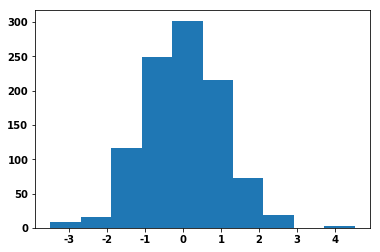

In [13]:
import matplotlib.pyplot as plt
plt.hist(norm_data)
plt.show()

In [14]:
W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([1, 2]))
X = tf.placeholder("float", [None,3])
y=tf.nn.sigmoid(tf.matmul(X,W)+b)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.array([[0.4,0.2 ,0.4],[0.3,0.4 ,0.5],[0.3,-0.4,0.5]])
    (_b,_W,_X,_y)=sess.run((b,W,X,y),feed_dict={X:X_array})
    print('b:',_b)
    print('W:',_W)
    print('X:',_X)
    print('y:',_y)

b: [[1.6722941 1.2971225]]
W: [[ 1.0260594   0.07474402]
 [-0.8501127  -0.39260173]
 [-0.45171425  1.316158  ]]
X: [[ 0.4  0.2  0.4]
 [ 0.3  0.4  0.5]
 [ 0.3 -0.4  0.5]]
y: [[0.8496693  0.85507375]
 [0.80442905 0.8606362 ]
 [0.89034796 0.89422715]]


In [15]:
def layer(output_dim,input_dim,inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

In [16]:
X = tf.placeholder("float", [None,4])
y=layer(output_dim=3,input_dim=4,inputs=X,activation=tf.nn.relu)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.array([[0.4,0.2 ,0.4,0.1],[0.3,0.4 ,0.5,0.3],[0.3,-0.4,0.5,0.2]])
    (_X,_y)=sess.run((X,y),feed_dict={X:X_array})
    print('X:',_X)
    print('y:',_y)

X: [[ 0.4  0.2  0.4  0.1]
 [ 0.3  0.4  0.5  0.3]
 [ 0.3 -0.4  0.5  0.2]]
y: [[0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.16294813 0.27238244 0.        ]]


In [18]:
X = tf.placeholder("float", [None,4])
h=layer(output_dim=3,input_dim=4,inputs=X,activation=tf.nn.relu)
y=layer(output_dim=2,input_dim=3,inputs=h)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.array([[0.4,0.2 ,0.4,0.5]])
    (layer_X,layer_h,layer_y)= sess.run((X,h,y),feed_dict={X:X_array})
    print('input Layer X:',layer_X)
    print('hidden Layer h:',layer_h)
    print('output Layer y:',layer_y)

input Layer X: [[0.4 0.2 0.4 0.5]]
hidden Layer h: [[0. 0. 0.]]
output Layer y: [[ 0.7723233  -0.64035034]]


In [19]:
def layer_debug(output_dim,input_dim,inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs,W,b

In [20]:
X = tf.placeholder("float", [None,4])
h,W1,b1=layer_debug(output_dim=3,input_dim=4,inputs=X,activation=tf.nn.relu)
y,W2,b2=layer_debug(output_dim=2,input_dim=3,inputs=h)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    X_array = np.array([[0.4,0.2 ,0.4,0.5]])
    (layer_X,layer_h,layer_y,W1,b1,W2,b2)= sess.run((X,h,y,W1,b1,W2,b2),feed_dict={X:X_array})
    print('input Layer X:',layer_X)
    print('W1:',W1)
    print('b1:',b1)
    print('hidden Layer h:',layer_h)
    print('W2:',W2)
    print('b2:',b2)
    print('output Layer y:',layer_y)

input Layer X: [[0.4 0.2 0.4 0.5]]
W1: [[-0.01808029  0.23005204  0.0623525 ]
 [ 0.89196795  0.4657232   0.5239977 ]
 [ 0.97138023 -1.7340504  -2.1092663 ]
 [ 0.40472883  0.83629435  0.76312083]]
b1: [[ 0.53118783 -0.29501557  1.2545012 ]]
hidden Layer h: [[1.2932658  0.         0.92209566]]
W2: [[-1.1881231  -2.6422    ]
 [ 0.14605474  1.0975378 ]
 [-0.11353733  0.47282982]]
b2: [[ 0.3001372 -0.5144883]]
output Layer y: [[-1.3411142 -3.495561 ]]
